# K-means

## Load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv( "../datasets/World Happiness Report_2019.csv")
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [4]:
variables = df.iloc[:,[2,3,4,5,6,7]]

## PCA y Kmeans

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=2) #Elegimos dos componentes principales, para bajar de dimensión 4 a 2 y poder graficar
pca = pca.fit_transform(variables) #Ajustar el modelo con nuestros datos y aplicar la reducción de la dimensión a 2D

In [7]:
pca.shape

(156, 2)

## K óptimo

In [10]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


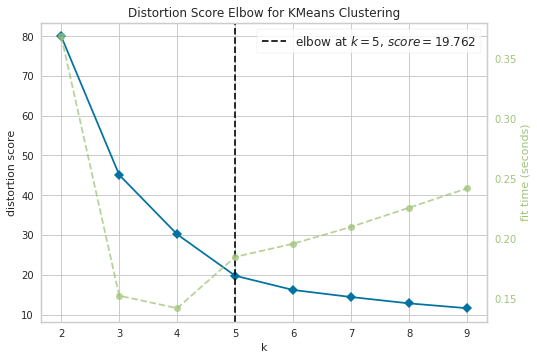

/home/lx97/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7feb23735310>,
                 k=None, model=None)

In [11]:
kelbow_visualizer(KMeans(random_state=4), pca, k=(2,10))

## K means

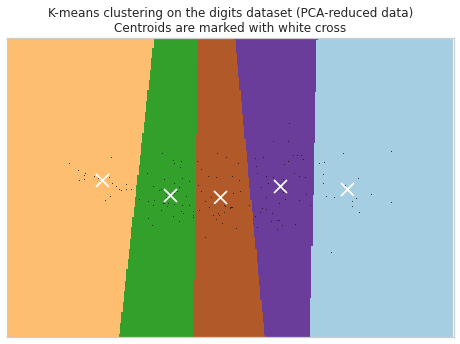

In [13]:
import matplotlib.pyplot as plt

reduced_data = pca
kmeans = KMeans(init="k-means++", n_clusters=5, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [14]:
kmeans.cluster_centers_

array([[ 2.03052388,  0.01797886],
       [-0.81261012, -0.05884229],
       [-1.9004735 ,  0.11509504],
       [ 0.95170418,  0.05331802],
       [-0.00501885, -0.07781134]])

## No PCA y Kmeans

In [23]:
variables.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
0,7.769,1.340,1.587,0.986,0.596,0.153
1,7.600,1.383,1.573,0.996,0.592,0.252
2,7.554,1.488,1.582,1.028,0.603,0.271
3,7.494,1.380,1.624,1.026,0.591,0.354
4,7.488,1.396,1.522,0.999,0.557,0.322


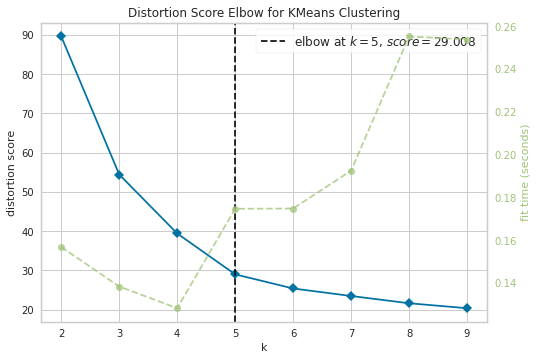

/home/lx97/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7feb2221cb20>,
                 k=None, model=None)

In [24]:
kelbow_visualizer(KMeans(random_state=4), variables, k=(2,10))

In [26]:
variables.shape

(156, 6)

In [28]:
kmeans = KMeans(init="k-means++", n_clusters=5, n_init=4)
kmeans.fit(variables)

KMeans(n_clusters=5, n_init=4)

In [29]:
kmeans.cluster_centers_

array([[3.54394118, 0.33970588, 0.73641176, 0.42076471, 0.24588235,
        0.20452941],
       [6.135975  , 1.16795   , 1.3979    , 0.884625  , 0.4402    ,
        0.15055   ],
       [5.38188571, 0.93965714, 1.27325714, 0.76974286, 0.36965714,
        0.16671429],
       [4.54747619, 0.60940476, 1.00933333, 0.52038095, 0.3502381 ,
        0.18571429],
       [7.20277273, 1.37395455, 1.50836364, 0.99104545, 0.53659091,
        0.25918182]])

In [30]:
variables.columnsns

Index(['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity'],
      dtype='object')